In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift
from scipy.signal import convolve2d

from Functions import *
from gaussfft import gaussfft
from fftwave import fftwave

# 1.3 Basis functions

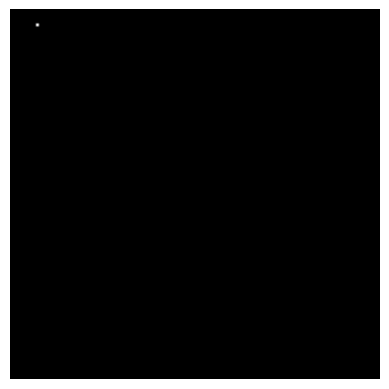

In [2]:
Fhat = np.zeros((128, 128)) 
Fhat[5, 9] = 1
showgrey(Fhat)

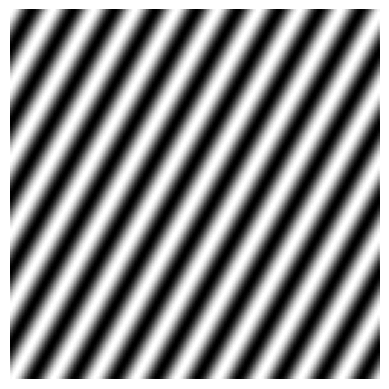

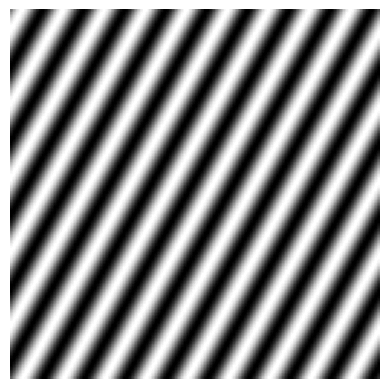

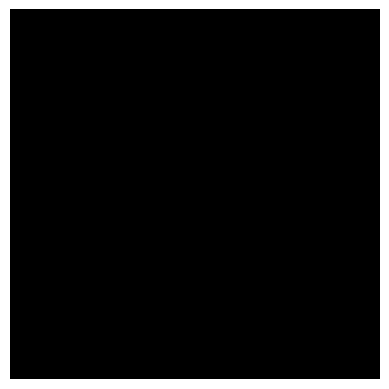

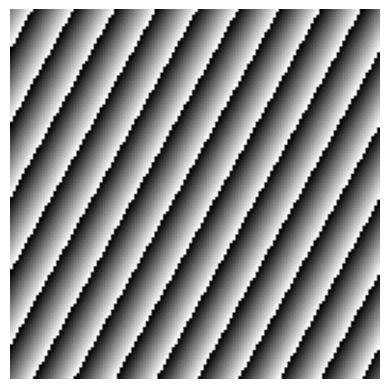

In [3]:
F = ifft2(Fhat)

Fabsmax = np.max(np.abs(F))
showgrey(np.real(F), True, 64, -Fabsmax, Fabsmax)
showgrey(np.imag(F), True, 64, -Fabsmax, Fabsmax)
showgrey(np.abs(F), True, 64, -Fabsmax, Fabsmax)
showgrey(np.angle(F), True, 64, -np.pi, np.pi)

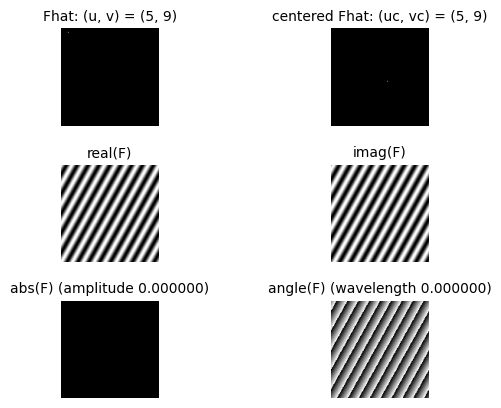

In [4]:
fftwave(5, 9)

### Question 1:

**(p, q) = (5, 9):**

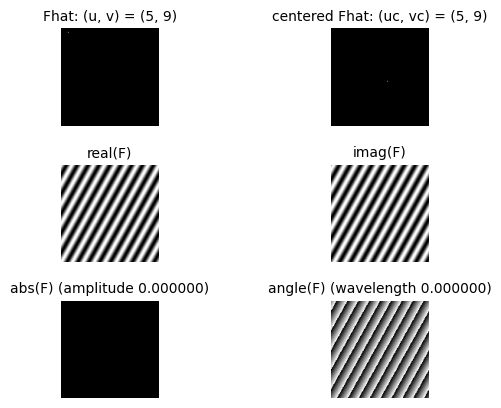

In [5]:
fftwave(5, 9)

**(p, q) = (9, 5):**

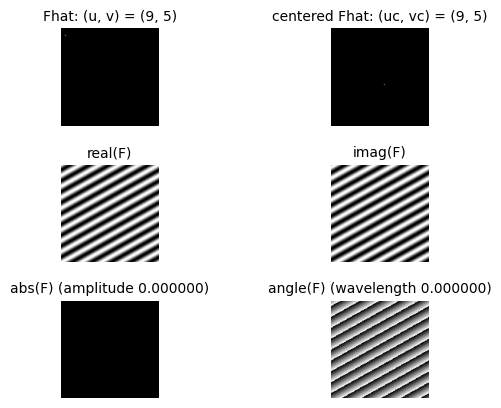

In [6]:
fftwave(9, 5)

**(p, q) = (17, 9):**

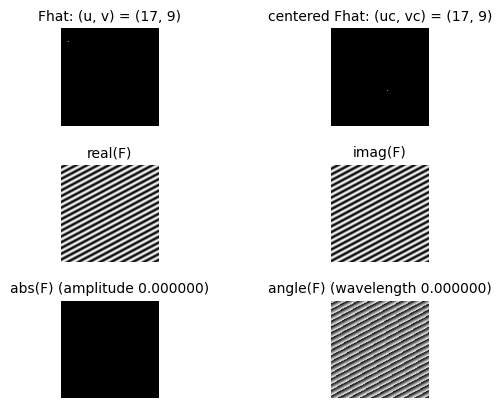

In [7]:
fftwave(17, 9)

**(p, q) = (17, 121):**

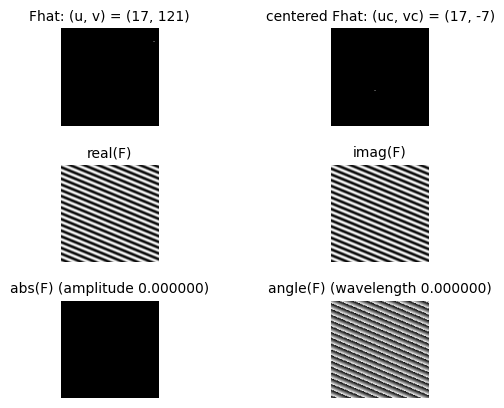

In [8]:
fftwave(17, 121)

**(p, q) = (5, 1):**

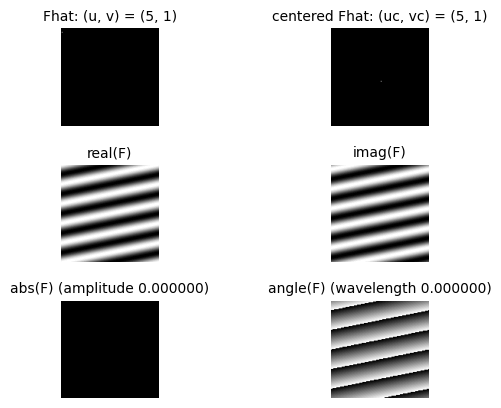

In [9]:
fftwave(5, 1)

**(p, q) = (125, 1):**

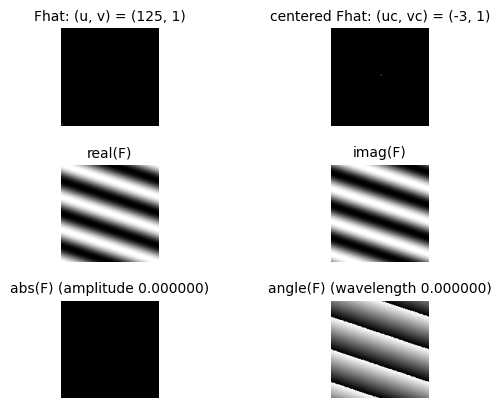

In [10]:
fftwave(125, 1)

*Repeat this exercise with the coordinates p and q set to (5, 9), (9, 5), (17, 9), (17, 121), (5, 1) and (125, 1) respectively. What do you observe?*

TBD

### Question 2:

*Explain how a position (p, q) in the Fourier domain will be projected as a sine wave in
the spatial domain. Illustrate with a figure.*

TBD

### Question 3:

*How large is the amplitude? Write down the expression derived from Equation (4) in
these notes. Complement the code (variable amplitude) accordingly.*

TBD

### Question 4: 

*How does the direction and length of the sine wave depend on p and q? Write down the explicit expression that can be found in the lecture notes. Complement the code (variable wavelength) accordingly.*

TBD

### Question 5

*What happens when we pass the point in the center and either p or q exceeds half the image size? Explain and illustrate graphically with a figure!*

TBD

### Question 6:

*What is the purpose of the instructions following the question: $\texttt{What is done by these instructions?}$ in the code?*

TBD

# 1.4 Linearity

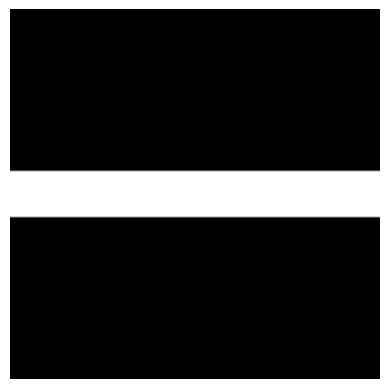

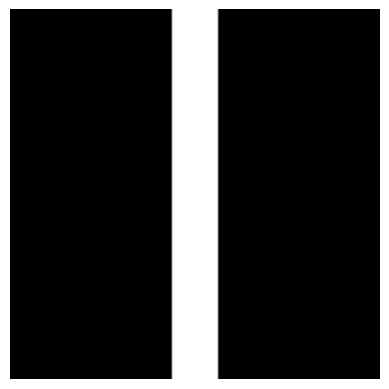

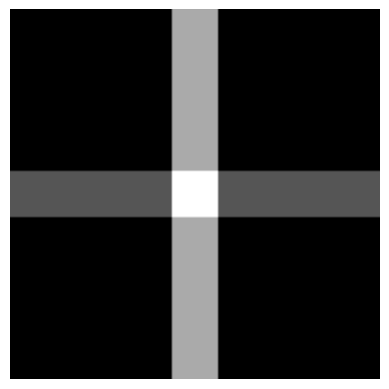

In [11]:
F = np.concatenate([np.zeros((56,128)), np.ones((16,128)), np.zeros((56,128))])
G = F.T
H = F + 2*G

showgrey(F)
showgrey(G)
showgrey(H)

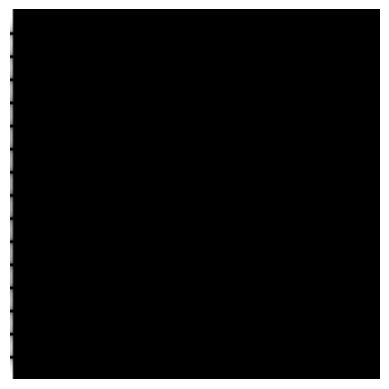

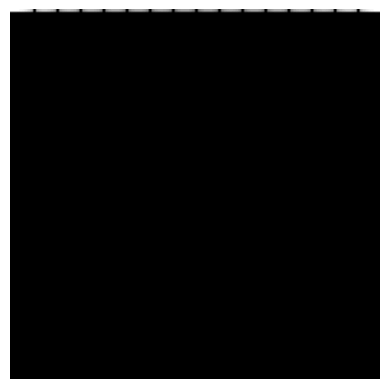

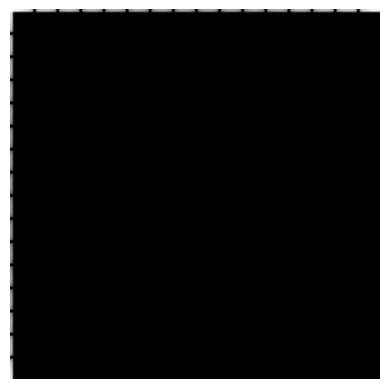

In [12]:
# FFT
Fhat = fft2(F)
Ghat = fft2(G)
Hhat = fft2(H)

showgrey(np.log(1 + np.abs(Fhat)))
showgrey(np.log(1 + np.abs(Ghat)))
showgrey(np.log(1 + np.abs(Hhat)))

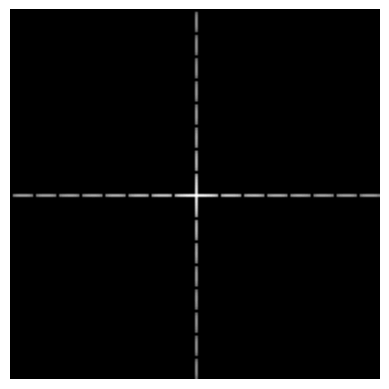

In [13]:
showgrey(np.log(1 + np.abs(fftshift(Hhat))))

### Question 7:

*Why are these Fourier spectra concentrated to the borders of the images? Can you give a mathematical interpretation? Hint: think of the frequencies in the source image and consider the resulting image as a Fourier transform applied to a 2D function. It might be easier to analyze each dimension separately!*

TBD

### Question 8:

*Why is the logarithm function applied?*

TBD

### Question 9:

*What conclusions can be drawn regarding linearity? From your observations can you derive a mathematical expression in the general case?*

TBD


# 1.5 Multiplication

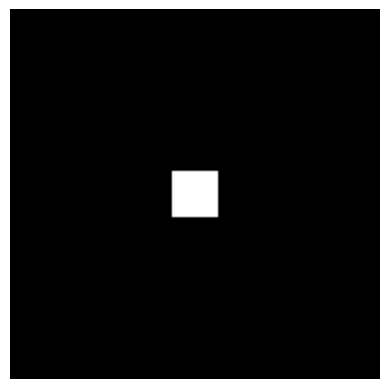

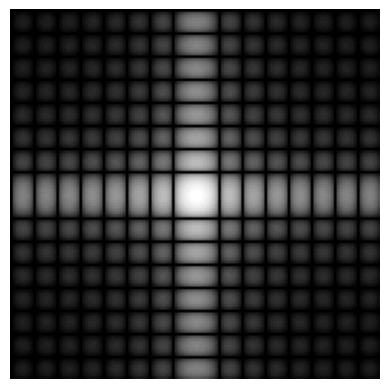

In [14]:
F = np.concatenate([np.zeros((56,128)), np.ones((16,128)), np.zeros((56,128))])
G = F.T

showgrey(F * G)
showfs(fft2(F * G))

### Question 10:

*Are there any other ways to compute the last image? Remember what multiplication in Fourier domain equals to in the spatial domain! Try to perform these alternative computations in practice, if you want.*

TBD

# 1.6 Scaling

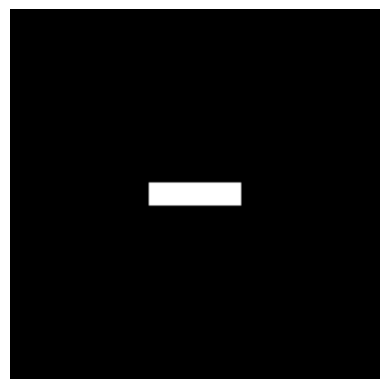

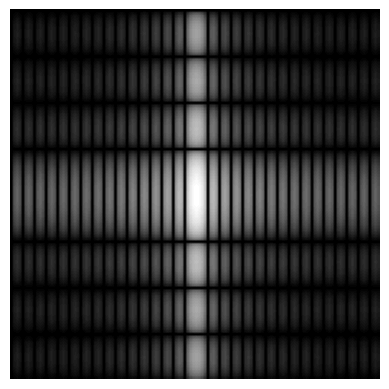

In [15]:
F = np.concatenate([np.zeros((60,128)), np.ones((8,128)), np.zeros((60,128))]) * \
    np.concatenate([np.zeros((128,48)), np.ones((128,32)), np.zeros((128,48))], axis=1)

showgrey(F)
showfs(fft2(F))

### Question 11:

*What conclusions can be drawn from comparing the results with those in the previous exercise? See how the source images have changed and analyze the effects of scaling.*

TBD


# 1.7 Rotation

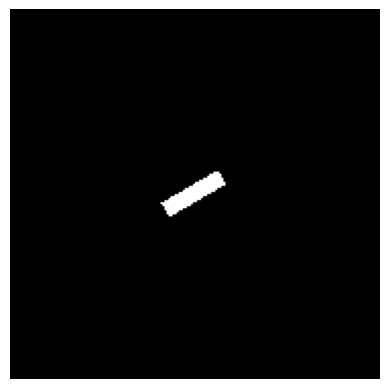

In [16]:
alpha = 30
G = rot(F, alpha)
showgrey(G)

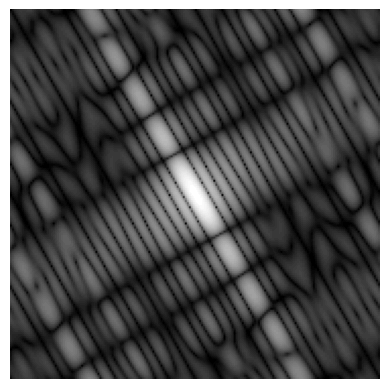

In [22]:
Ghat = fft2(G)
showfs(Ghat)

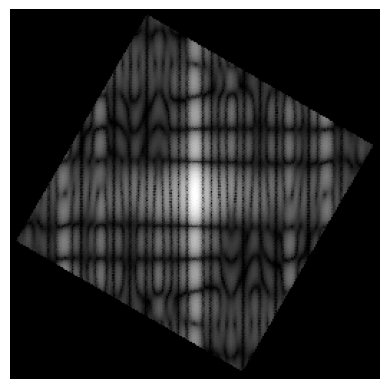

In [25]:
Hhat = rot(fftshift(Ghat), -alpha)
showgrey(np.log(1 + abs(Hhat)))

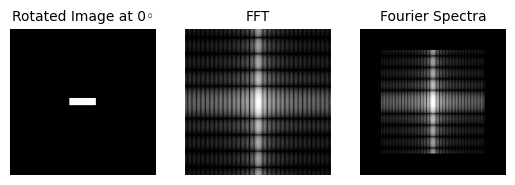

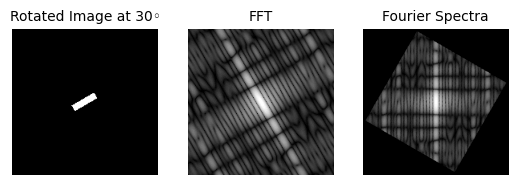

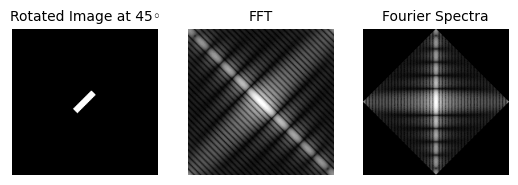

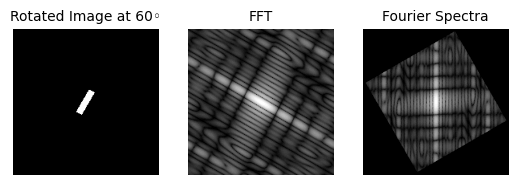

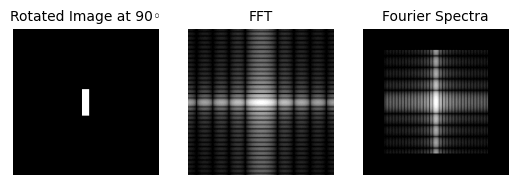

In [32]:
angles = [0, 30, 45, 60, 90]
for angle in angles:
    plt.figure()
    G = rot(F, angle)
    plt.subplot(1, 3, 1)
    showgrey(G, display=False)
    plt.title(f'Rotated Image at {angle}◦')

    plt.subplot(1, 3, 2)
    showfs(fft2(G), display=False)
    plt.title('FFT')

    plt.subplot(1, 3, 3)
    Hhat = rot(fftshift(fft2(G)), -angle)
    showgrey(np.log(1 + abs(Hhat)), display=False)
    plt.title('Fourier Spectra')
    
    plt.show()

### Question 12:

*What can be said about possible similarities and differences? Hint: think of the frequencies and how they are affected by the rotation.*

TBD